In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics


In [ ]:
|from sklearn.naive_bayes import GaussianNB

In [ ]:
wine =  pd.read_csv('wine.csv')
wine.head()

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [ ]:
wine.describe().transpose()

count        mean         std     min       25%  \
Wine                  178.0    1.938202    0.775035    1.00    1.0000   
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic.acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Acl                   178.0   19.494944    3.339564   10.60   17.2000   
Mg                    178.0   99.741573   14.282484   70.00   88.0000   
Phenols               178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid.phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanth               178.0    1.590899    0.572359    0.41    1.2500   
Color.int             178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD                    178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Wine                    2.000    3.0000     3.00  
Alcohol                13.050   13.6775    14.83  
Malic.acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Acl                    19.500   21.5000    30.00  
Mg                     98.000  107.0000   162.00  
Phenols                 2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid.phenols    0.340    0.4375     0.66  
Proanth                 1.555    1.9500     3.58  
Color.int               4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD                      2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

In [ ]:
wine.shape

(178, 14)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


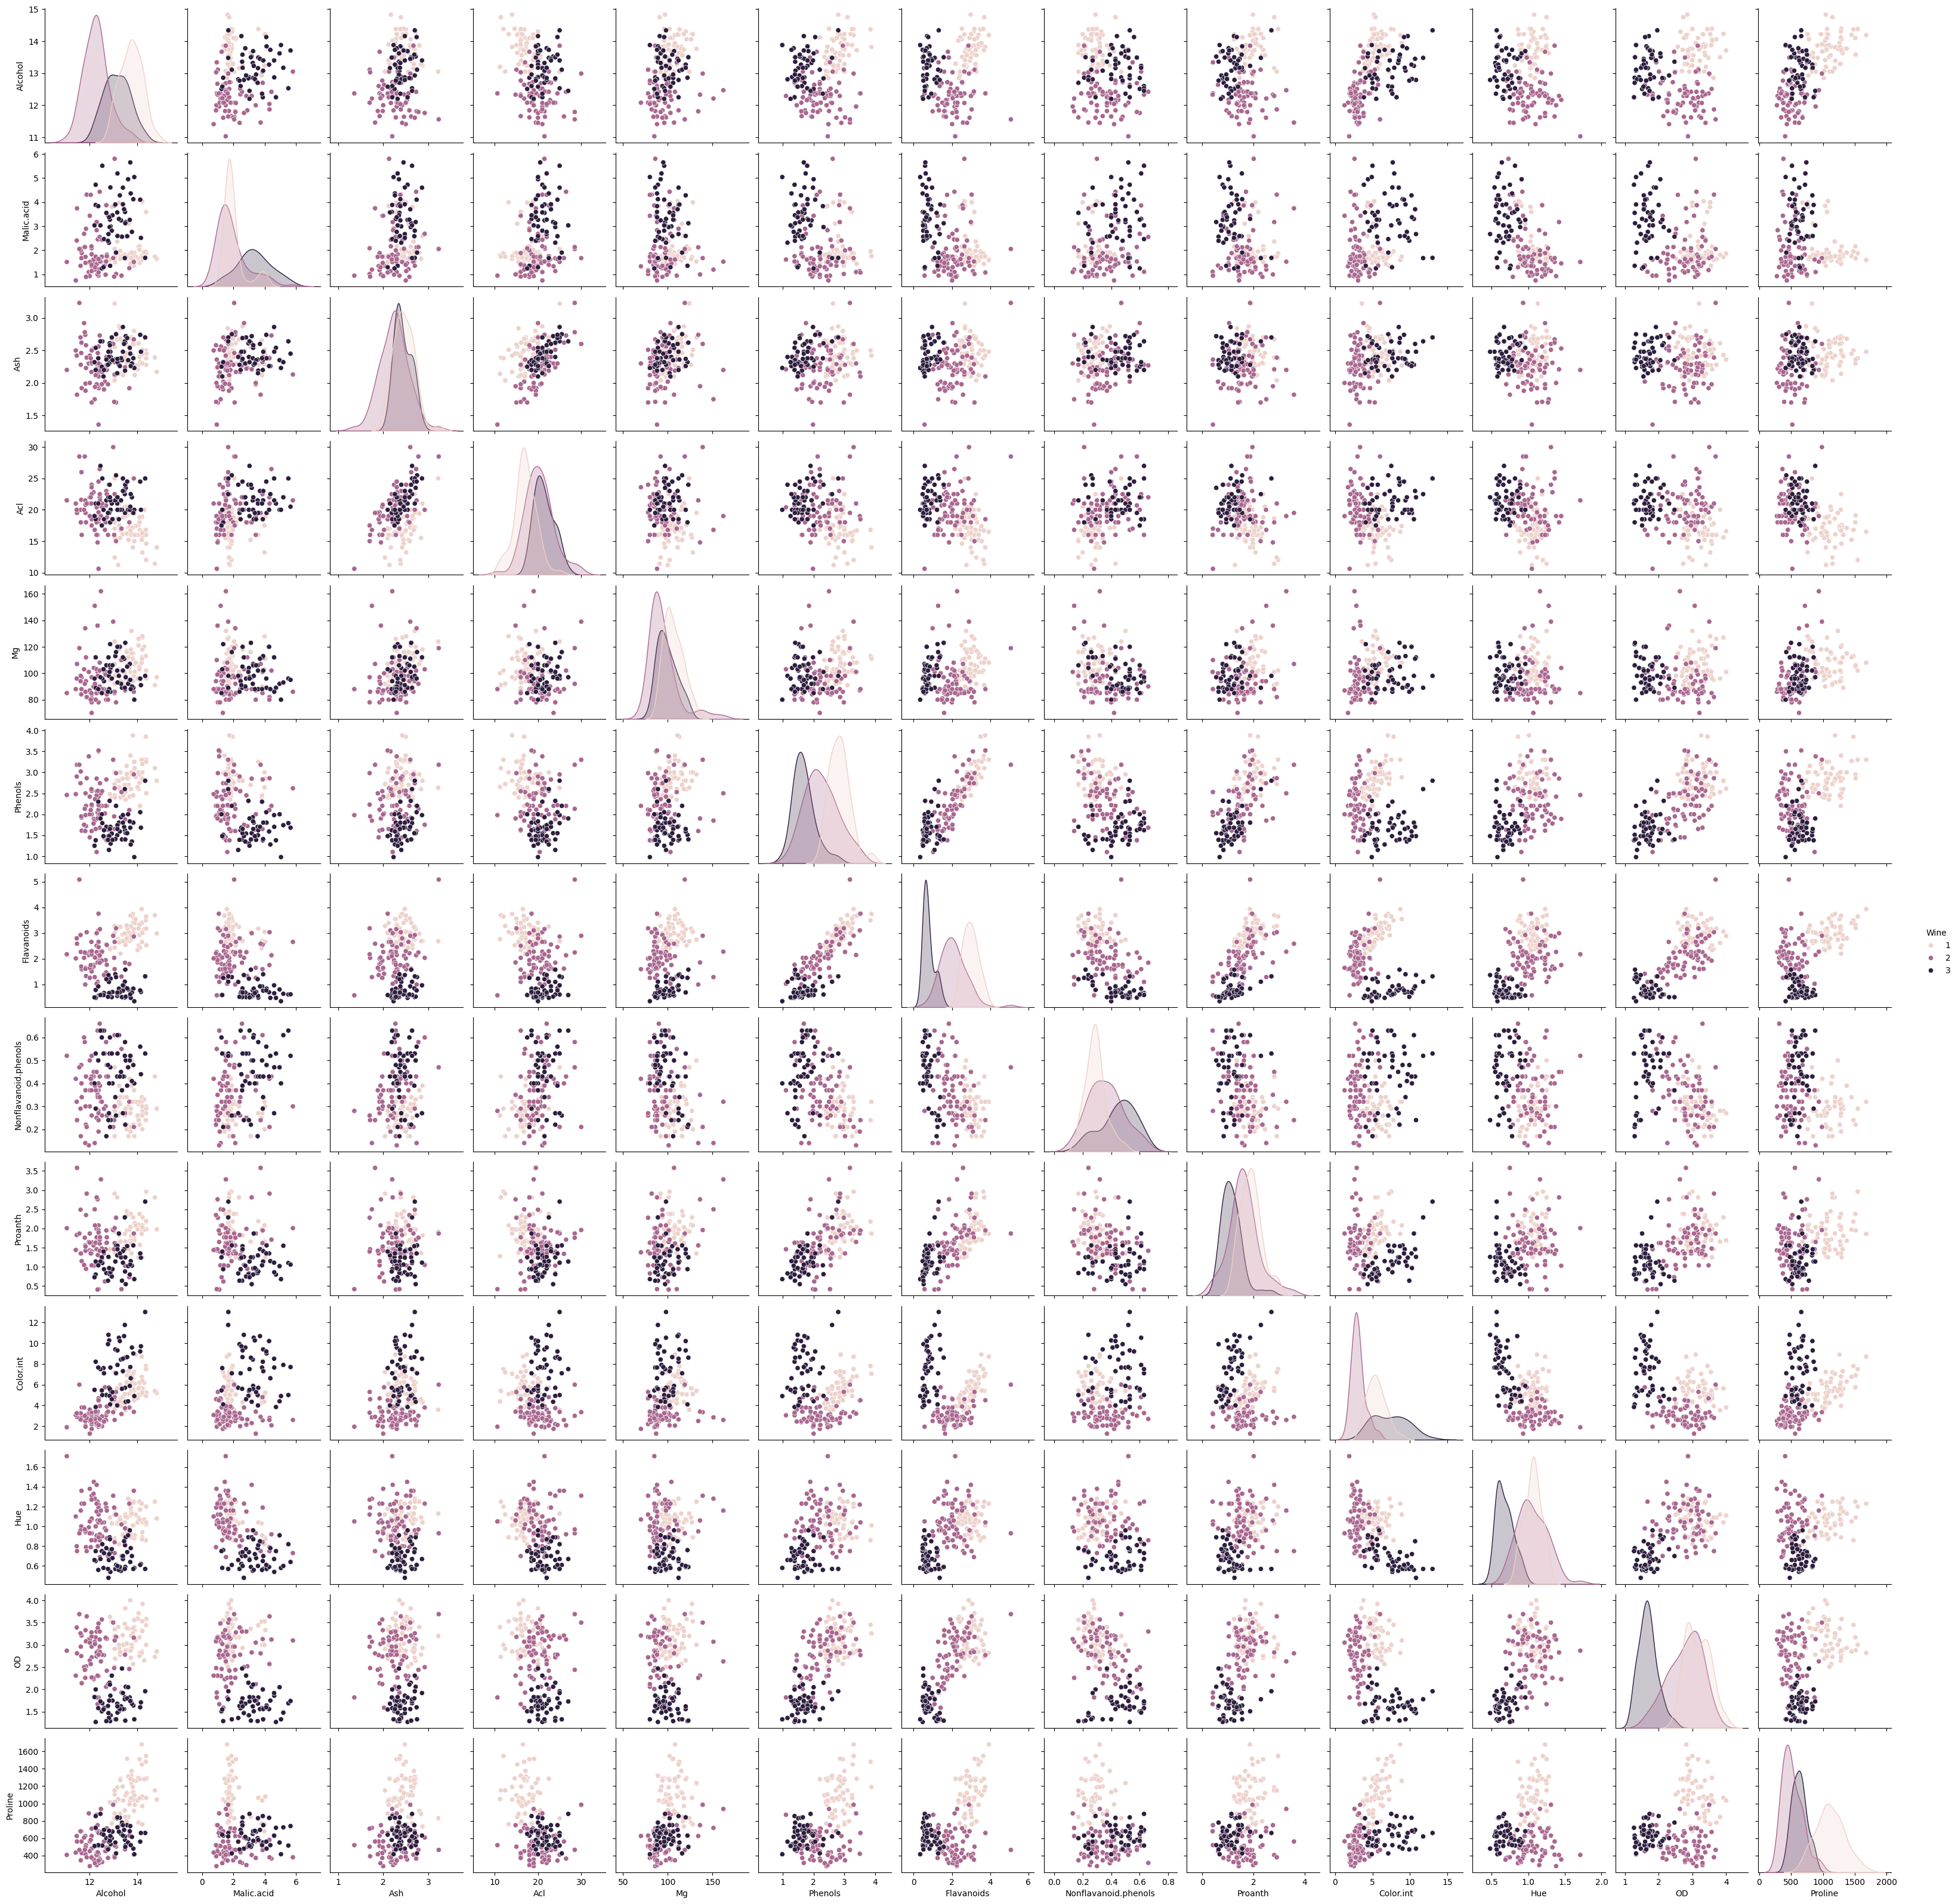

In [ ]:
import seaborn as sns
sns.pairplot(wine,diag_kind = 'kde', hue='Wine')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = wine.drop('Wine',axis=1)
y= wine.Wine


In [ ]:
x.head()

Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [ ]:
train_set,test_set,train_labels,test_labels = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=GaussianNB()
model.fit(train_set,train_labels)


GaussianNB()

In [ ]:
model.score(train_set,train_labels)

0.971830985915493

In [ ]:
y_pred = model.predict(test_set)
print(metrics.classification_report(test_labels,y_pred))
print(metrics.confusion_matrix(test_labels,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
